No notebook anterior, nós aprendemos intuitivamente como o perceptron aprende. De maneira geral, nós vamos atualizando os pesos e o bias sempre buscando diminuir uma função de custo. Nesse notebook, nós vamos ver como esse aprendizado realmente acontence, tanto na teoria quanto na prática. Também utilizaremos o Perceptron para resolver problemas de classificação e regressão.

__Objetivos__:

- Implementar o perceptron e seu modelo de aprendizado em Python puro e Numpy
- Utilizar o perceptron para regressão e classificação

# Sumário

[Introdução](#Introdução)
- [Regra de Aprendizado do Perceptron](#Regra-de-Aprendizado-do-Perceptron)
- [Pseudo-algoritmo do Perceptron](#Pseudo-algoritmo-do-Perceptron)

[Classificação](#Classificação)
- [Porta AND/OR](#Porta-AND/OR)
- [Exercício de Classificação](#Exerc%C3%ADcio-de-Classificação)

[Regressão](#Regressão)
- [Exercício de Regressão](#Exerc%C3%ADcio-de-Regressão)

[Referências](#Referências)

# Imports e Configurações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

/home/anderson/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Introdução

O tipo mais básico de Rede Neural Artificial é formada por apenas um neurônio, o __Perceptron__. Inicialmente, o Perceptron foi projetado para ser um __classificador binário linear__ responsável por mapear uma ou mais entradas em uma saída desejada. Porém, também podemos utilizá-lo para resolver problemas de __regressão linear__. Ele foi projetado em 1957 por Frank Rosenblatt.

O perceptron é formado por:

<img src='images/perceptron.png' width='350'>

- __entradas__ $x_1,...,x_D$: representam os atributos dos seus dados com dimensionalidade $D$. O Perceptron aceita qualquer tamanho de entrada, porém a saída é sempre apenas um valor.
- __junção aditiva__ $\sum$: também chamada de _função agregadora_, nada mais é que a soma ponderada das entradas com os __pesos__ ($w_1,...,w_D)$. Em geral, o resultado é somado com um __bias__ $b$, responsável por deslocar o resultado do somatório. A junção aditiva é descrita pela seguinte fórmula:

$$\sum_i^D{x_iw_i} + b$$

- __função de ativação__ $f$: utilizada para mapear o resultado da junção aditiva em uma saída esperada. Mais detalhes abaixo.

Logo, o Perceptron é representado pela seguinte fórmula matemática:

$$\widehat{y}_i = f(\sum_i^D{x_iw_i} + b)$$

Onde:

- $D$: representa a dimensionalidade das amostras, ou seja, a quantidade de atributos de cada amostra.
- $x_i$: representam os atributos de uma amostra que servem de entrada para o Perceptron.
- $w_i$: representam os __pesos sinápticos__ que ponderam as entradas.
- $b$: representa o __bias__, responsável por deslocar a fronteira de decisão além da origem e não depende de nenhum valor de entrada. Repare que o bias encontra-se fora do somatório.
- $f$: __função de ativação__. Quando a função de ativação é linear, ou seja, nenhuma transformação é aplicada no resultado da junção aditiva, o Perceptron atua como um __Regressor Linear__. Se precisamos efetuar uma __Classificação binária__, devemos utilizar a função _step_ (também conhecida como _função degrau_) para mapear a saída em um valor discreto (0 ou 1):

$$f = \begin{cases}1 & se \ wx+b > 0\\0 & caso \ contr\acute ario\end{cases}$$

- $\widehat{y}$: representa a saída do Perceptron (o valor predito).

__Observações importantes__:

- O Perceptron não faz __Classificação Multiclasse__.
- __A atualização dos pesos é *online*, ou seja, efetuada amostra a amostra__ utilizando uma fórmula pré-definida que veremos na seção a seguir.

## Regra de Aprendizado do Perceptron

O Perceptron tem sua própria forma de aprendizado conforme definido no seu artigo original. Na verdade, a fórmula para atualização dos pesos e bias é bem simples:

$$w_i = w_i + \lambda(y_i - \widehat{y}_i)x_i$$
<br>
$$b_i = b_i + \lambda(y_i - \widehat{y}_i)$$

Onde $\lambda$ é a __taxa de aprendizagem__ (___learning rate___).

Repare que $y_i - \widehat{y}_i$ significa calcular a diferença entre o valor esperado ($y_i$) e o valor predito ($\widehat{y}_i$). Supondo que estamos fazendo __classificação binária__ de uma amostra $(x_i, y_i)$. Nesse caso, teremos duas possibilidades:
- __O valor esperado é $y_i = \widehat{y}_i$__, ou seja, a saída do Perceptron (após a função de ativação _step_) é __igual__ a saída esperada. Nesse caso, __a diferença $y_i - \widehat{y}_i = 0$ e não haverá atualização de pesos__.
- __O valor esperado é $y_i \neq \widehat{y}_i$__, ou seja, a saída do Perceptron (após a função de ativação _step_) é __diferente__ da saída esperada. Nesse caso, __a atualização dos pesos será dada pela diferença $y_i - \widehat{y}_i$__. Repare que:
    - quando essa diferença é __negativa__ (ou seja, $y_i = 0$ e $\widehat{y}_i = 1$), __os pesos tendem a diminuir__.
    - quando essa diferença é __positiva__ (ou seja, $y_i = 1$ e $\widehat{y}_i = 0$), __os pesos tendem a aumentar__.

## Pseudo-algoritmo do Perceptron

1. Inicialize os pesos $w$ e o bias $b$
2. Para cada amostra $(x_n, y_n)$ do nosso banco:
    1. Calcule $\widehat{y} = f(\sum_i^D{x_iw_i} + b)$, onde $f$ é a __função _step_ para classificação__ e __linear no caso da regressão__
    2. Calcule o $erro = y_n - \widehat{y}$
    3. Atualize os pesos $w_i = w_i + \lambda*erro*x_i$
    4. Atualize o bias $b_i = b_i + \lambda*erro$
3. Repita o passo 2 por N vezes ou até que alguma medida de custo para o $erro$ seja menor que um valor pré-determinado.
    
Repare, como dito lá em cima, que __a atualização dos pesos e bias é feito a cada amostra__, e não somente após ver todas as amostras do banco.

# Classificação

## Porta AND/OR

In [2]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#y = np.array([0, 1, 1, 1]) # porta OR
y = np.array([0, 0, 0, 1]).T # porta AND

print(x.shape, y.shape)

(4, 2) (4,)


### Python

In [10]:
D = x.shape[1] #D pesos possui a quantidade de colunas (atributos) de x == qtde entradas perceptron
w = [2*random()-1 for i in range(D)] #D pesos com valores aleatórios entre -1 e 1
b = 2*random()-1 #b fica entre -1 e 1

learning_rate = 1.0

for step in range(101):
    cost = 0 #averigua se o perceptron está aprendendo
    #indice n indica real
    for x_n,y_n in zip(x,y):
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n,w)])+b
        y_pred = 1 if y_pred > 0 else 0
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n,w)]
        b = b + learning_rate*error
        cost += error**2
        
    if step % 10 == 0:
        print('step{0}:{1}'.format(step,cost))
        
print('w=',w)
print('bias=',b)
print('y_pred= {0}'.format(np.dot(x,np.array(w))+b))#saída bruta, sem passar pela f. de ativação


step0:2
step10:0
step20:0
step30:0
step40:0
step50:0
step60:0
step70:0
step80:0
step90:0
step100:0
w= [1.5602954805456015, 0.5643865104525552]
bias= -2.1148011037626215
y_pred= [-2.1148011  -1.55041459 -0.55450562  0.00988089]


In [ ]:
#resultado acima:
#y_pred= [-3.90047089 -1.99832769 -0.96378621  0.93835698]
#se passasse pela função de ativação, o resultado seria
#[0,0,0,1]
#OBS: cost = 3 => errou 3 de 4

### Numpy

In [11]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1

learning_rate = 0.1

for step in range(101):
    cost = 0
    for x_n,y_n in zip(x,y):
        y_pred = np.dot(x_n,w)+b
        y_pred = np.where(y_pred>0,1,0)
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error,x_n)
        b = b + learning_rate*error
        cost += error**2
    if step % 10 == 0:
        print('step{0}:{1}'.format(step,cost))
        
print('w=',w)
print('bias=',b)
print('y_pred= {0}'.format(np.dot(x,np.array(w))+b))

step0:1
step10:0
step20:0
step30:0
step40:0
step50:0
step60:0
step70:0
step80:0
step90:0
step100:0
w= [0.40622005 0.76602118]
bias= -0.7817439437708454
y_pred= [-0.78174394 -0.01572276 -0.37552389  0.39049729]


## Exercício de Classificação

(100, 2) (100,)


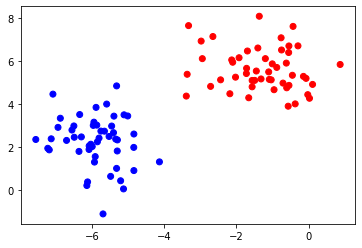

In [12]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

In [13]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

### Python

step0:1
step10:0
step20:0
step30:0
step40:0
step50:0
step60:0
step70:0
step80:0
step90:0
step100:0
w= [0.8803335905848082, 0.8416098605896842]
bias= -0.5097927059684342


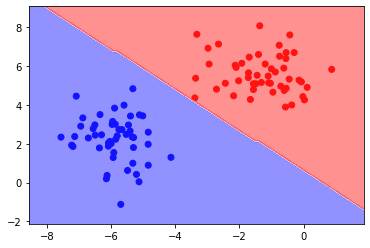

In [17]:
D = x.shape[1] #D pesos possui a quantidade de colunas (atributos) de x == qtde entradas perceptron
w = [2*random()-1 for i in range(D)] #D pesos com valores aleatórios entre -1 e 1
b = 2*random()-1 #b fica entre -1 e 1

learning_rate = 0.01

for step in range(101):
    cost = 0 #averigua se o perceptron está aprendendo
    #indice n indica real
    for x_n,y_n in zip(x,y):
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n,w)])+b
        y_pred = 1 if y_pred > 0 else 0
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n,w)]
        b = b + learning_rate*error
        cost += error**2
        
    if step % 10 == 0:
        print('step{0}:{1}'.format(step,cost))
        
print('w=',w)
print('bias=',b)
#print('y_pred= {0}'.format(np.dot(x,np.array(w))+b))
plot_linear_classifier(x,y,w,b)

### Numpy

step0:4
step10:0
step20:0
step30:0
step40:0
step50:0
step60:0
step70:0
step80:0
step90:0
step100:0
w= [1.27670194 1.40543002]
bias= -0.8559783612353613


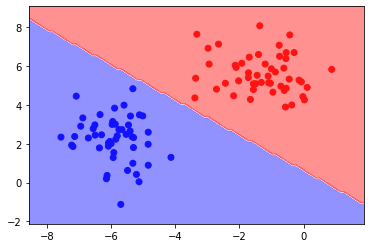

In [19]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1

learning_rate = 0.1

for step in range(101):
    cost = 0
    for x_n,y_n in zip(x,y):
        y_pred = np.dot(x_n,w)+b
        y_pred = np.where(y_pred>0,1,0)
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error,x_n)
        b = b + learning_rate*error
        cost += error**2
    if step % 10 == 0:
        print('step{0}:{1}'.format(step,cost))
        
print('w=',w)
print('bias=',b)
plot_linear_classifier(x,y,w,b)

# Regressão 

Para transformar o Perceptron em um __regressor linear__, só o que temos de fazer é __remover a função de ativação _step___, transformando-a em uma função de ativação linear.

Apesar dessa modificação, __a fórmula de atualização dos pesos não sofre nenhuma alteração__. 

Vamos, então, implementar nosso perceptron para classificação em Python, Numpy, Keras e TensorFlow:

In [20]:
df = pd.read_csv('data/medidas.csv')
print(df.shape)
df.head(10)

(100, 2)


,Altura,Peso
0,187,109.72
1,177,91.09
2,180,88.93
3,177,89.39
4,177,92.02
5,183,94.70
6,178,83.57
7,177,85.19
8,183,92.96
9,188,108.21


Text(0, 0.5, 'Peso')

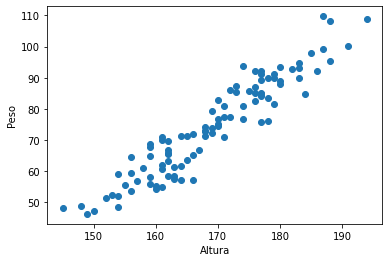

In [21]:
x = df.Altura.values
y = df.Peso.values

plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

In [22]:
print(x.shape, y.shape)

(100,) (100,)


In [24]:
x = x.reshape(-1, 1)

print(x.shape, y.shape) #x vira matriz 100x1, y não precisa disso aqui

(100, 1) (100,)


### Python

__Exercício__: tentar estimar as learning_rates de **w** e __b__. Elas são diferentes por que nossos dados não estão na mesma escala!

In [27]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

for step in range(10001):
    cost = 0
    for x_n, y_n in zip(x, y):
        # qual linha devemos remover para transformar o Perceptron num regressor?
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        #y_pred = 1 if y_pred > 0 else 0
        #comentando a linha acima o perceptron vira regressor
        error = y_n - y_pred
        w = [w_i + 0.0000001*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + 0.001*error
        cost += error**2

    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: 2279547.5988146607
step 1000: 11794.877212214478
step 2000: 7744.927804581877
step 3000: 5481.528186292416
step 4000: 4216.727455488012
step 5000: 3510.060129904245
step 6000: 3115.314891829638
step 7000: 2894.871615739767
step 8000: 2771.812619265372
step 9000: 2703.1515404883417
step 10000: 2664.8678815706626
w:  [1.3048960644140941]
b:  -146.44670419183643


### Numpy 

In [29]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1 

for step in range(10001):
    cost = 0
    for x_n, y_n in zip(x, y):
        # qual linha devemos remover para transformar o Perceptron num regressor?
        y_pred = np.dot(x_n, w) + b 
        #y_pred = np.where(y_pred > 0, 1, 0)
        error = y_n - y_pred
        w = w + 1e-7*np.dot(error, x_n)
        b = b + 1e-2*error
        cost += error**2
    
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: 27239.68325579232
step 1000: 3938.9873452454854
step 2000: 2851.2103101754847
step 3000: 2663.1175172367793
step 4000: 2631.4488395281132
step 5000: 2626.4824317451453
step 6000: 2625.8640336024896
step 7000: 2625.8626436960194
step 8000: 2625.9075154448824
step 9000: 2625.934350360022
step 10000: 2625.9470211411026
w:  [1.36984944]
b:  -157.88974858747153


### Numpy com Pré-processamento

In [30]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 0.9999999999999991


In [31]:
reg = LinearRegression()
reg.fit(x,y)#todas as colunas(atributos) da entrada precisam estar normalizados
            #sobre os mesmos valores(a saída(y) não precisa disso)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [33.60164767]
b:  74.99636286981102


In [34]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1 

learning_rate = 0.001 # <- tente estimar a learning_rate

for step in range(1001):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b 
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error
        cost += error**2
    
    if step%100 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: 532814.7534834375
step 100: 3129.003788906753
step 200: 2623.546383454298
step 300: 2611.5382455695635
step 400: 2611.2516149295307
step 500: 2611.2445703495864
step 600: 2611.2443661375537
step 700: 2611.2443555927257
step 800: 2611.2443544646385
step 900: 2611.2443543026225
step 1000: 2611.2443542779365
w:  [33.60180845]
b:  74.93896426879841


## Exercício de Regressão

In [35]:
df = pd.read_csv('data/notas.csv')

print(df.shape)
df.head(10)

(25, 4)


,prova1,prova2,prova3,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


Text(0, 0.5, 'Final')

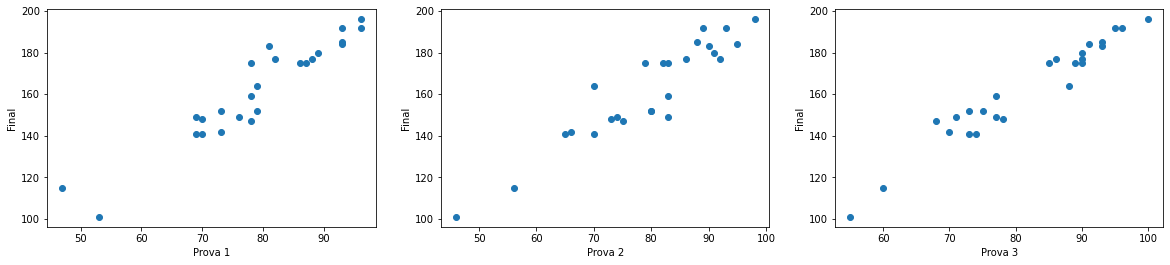

In [36]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
plt.scatter(df.prova1.values, df.final.values)
plt.xlabel('Prova 1')
plt.ylabel('Final')

plt.subplot(1, 3, 2)
plt.scatter(df.prova2.values, df.final.values)
plt.xlabel('Prova 2')
plt.ylabel('Final')

plt.subplot(1, 3, 3)
plt.scatter(df.prova3.values, df.final.values)
plt.xlabel('Prova 3')
plt.ylabel('Final')

In [37]:
x = df[['prova1', 'prova2', 'prova3']].values
y = df['final'].values

print(x.shape, y.shape)

(25, 3) (25,)


In [38]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

In [39]:
reg = LinearRegression()
reg.fit(x, y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [ 8.72048636 14.1054877  26.26749487]
b:  150.65175754349872


### Python

In [44]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

learning_rate = 0.01 # <- tente estimar a learning_rate

for step in range(2000): # <- tente estimar o número de passos
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
        cost += error**2
        
    if step%200 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: 499682.43735406775
step 200: 177.70886279550805
step 400: 148.72447276479556
step 600: 146.4431635670361
step 800: 146.18643500131597
step 1000: 146.154923975149
step 1200: 146.15110624638936
step 1400: 146.15068802519642
step 1600: 146.15065945294907
step 1800: 146.15066470530653
w:  [8.725232556640737, 14.139464454161923, 26.32049704334868]
b:  150.71119154982304


### Numpy

In [45]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1       

learning_rate = 0.01 # <- tente estimar a learning_rate

for step in range(1001): # <- tente estimar o número de passos
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b 
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error
        cost += error**2
    
    if step%200 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: 501064.72234880354
step 200: 174.42996322640565
step 400: 148.47832432582152
step 600: 146.4158692403239
step 800: 146.1830781693958
step 1000: 146.1545109398969
w:  [ 8.79773284 14.09408407 26.2914516 ]
b:  150.70713632850084


# Referências

- [Artigo original do Perceptron](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.335.3398&rep=rep1&type=pdf)